In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from utils.data import (
    DATA_SOURCE,
    EXP_CSV_COLS,
    EXP_CSV_PATH,
    TRIALS_CSV_COLS,
    TRIALS_CSV_PATH,
)

VAL_SOURCE = DATA_SOURCE.parent / "validation"
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 100

IMG_PATH = Path.cwd().parent.parent / 'notebooks' / 'img'
IMG_PATH.mkdir(parents=True, exist_ok=True)
plt.style.use("default")
plt.rcParams.update({
    #"text.usetex": False,
    "font.family": "serif",
    #"font.serif": ["Helvetica"],
    'figure.dpi': 200,  # renders images larger for notebook
    'axes.grid': True,
    'grid.alpha': 0.3,

})

In [2]:
mat2mat_d = {'A': "3C92", "B": "T37", "C": "3C95", "D": "79", "E": "ML95S"}

In [3]:
# load up meta info
exp_tab = pd.read_csv(EXP_CSV_PATH, dtype=EXP_CSV_COLS)
trials_tab = pd.read_csv(
    TRIALS_CSV_PATH,
    dtype=TRIALS_CSV_COLS,
    parse_dates=["start_date", "end_date"],
)
# only one row should be returned
meta_info_df = trials_tab.merge(exp_tab, on="experiment_uid")
exp_tab

experiment_uid  debug  subsample_factor  batch_size  n_folds  \
0           68158   True                 8           4        1   
1           d2b57   True                 8           4        1   
2           ea1fe  False                 1          64        1   
3           f1583   True                 8           4        1   
4           b588e   True                 8           4        1   
5           6af40   True                 8           4        1   
6           2f422   True                 8           4        1   
7           fd0ea  False                 1          64        4   
8           cdb55  False                 1          64        6   
9           6a78a   True                 8           4        1   
10          98eec   True                 8           4        1   
11          c4420   True                 8           4        1   
12          20386   True                 8           4        1   
13          e8f7f   True                 8           4        1   
14          75010  False                 1          64        4   
15          14abf  False                 1          64        4   
16          ea89c  False                 1          64        4   
17          60642  False                 1          64        4   
18          0a2ef  False                 1          64        4   
19          b7cd2  False                 1          64        4   
20          bfd85  False                 1          64        4   
21          dec38  False                 1          64        4   
22          67a8c  False                 1          64        4   
23          6909a  False                 1          64        4   
24          58ab3  False                 1          64        4   
25          c7d33  False                 1          64        4   
26          c9cfe  False                 1          64        1   
27          9fa45  False                 1          64        4   
28          49405  False                 1          64        4   
29          89733  False                 1          64        4   
30          ef5cc  False                 1          64        4   
31          b5226  False                 1          64        4   
32          9df83  False                 1          64        4   
33          314de  False                 1          64        4   
34          68a16  False                 1          64        4   
35          cd184  False                 1          64        4   
36          ebf34  False                 1          64        4   
37          07cd3  False                 1          64        4   
38          436f3  False                 1          64        4   
39          5ae98  False                 1          64        1   
40          ff6c5  False                 1          64        1   
41          da6f5  False                 1          64        4   
42          c15ca  False                 1          64        1   
43          40ce5  False                 1          64        1   
44          a7f70  False                 1          64        1   
45          f653e  False                 1          64        1   
46          a31d2  False                 1          64        1   
47          58bdf  False                 1          64        1   
48          5ec5c  False                 1          64        1   

    predicts_p_directly  n_epochs  \
0                  True         2   
1                  True         2   
2                  True      5000   
3                  True         2   
4                 False         2   
5                 False         2   
6                  True         2   
7                  True     30000   
8                  True     10000   
9                  True         2   
10                 True         2   
11                 True         2   
12                 True         2   
13                 True         2   
14                 True      5000   
15                 True      5000   
16                 True

In [18]:
meta_info_df.query("model_size == 906 and tag.str.startswith('final')", engine='python')

experiment_uid material model_uid  seed  fold  avg_rel_err  \
2463          40ce5        A  5d3b4659     0     0     0.015763   
2464          40ce5        B  b89e2778     0     0     0.012399   
2465          40ce5        C  9cc9ec6a     0     0     0.017952   
2466          40ce5        D  7d3f9292     0     0     0.023827   
2467          40ce5        E  f37feb8f     0     0     0.019661   

      95-perc_rel_err  99-perc_rel_err    max_rel_err          start_date  \
2463         0.043545         0.061211  468216.031250 2024-07-18 08:21:29   
2464         0.031285         0.051958  216765.687500 2024-07-18 08:41:23   
2465         0.042924         0.059315  205468.718750 2024-07-18 09:38:59   
2466         0.067020         0.106718  234449.703125 2024-07-18 10:20:51   
2467         0.055412         0.081247  427080.125000 2024-07-18 10:26:04   

                end_date  debug  subsample_factor  batch_size  n_folds  \
2463 2024-07-18 10:42:54  False                 1          64        1   
2464 2024-07-18 10:42:54  False                 1          64        1   
2465 2024-07-18 10:42:54  False                 1          64        1   
2466 2024-07-18 10:42:54  False                 1          64        1   
2467 2024-07-18 10:42:54  False                 1          64        1   

      predicts_p_directly  n_epochs  \
2463                 True     10000   
2464                 True     10000   
2465                 True     10000   
2466                 True     10000   
2467                 True     10000   

                                                    tag  model_size  
2463  final: H_ts: 8 -> 4 -> 1, H_s: 8, P: n_scalars...         906  
2464  final: H_ts: 8 -> 4 -> 1, H_s: 8, P: n_scalars...         906  
2465  final: H_ts: 8 -> 4 -> 1, H_s: 8, P: n_scalars...         906  
2466  final: H_ts: 8 -> 4 -> 1, H_s: 8, P: n_scalars...         906  
2467  final: H_ts: 8 -> 4 -> 1, H_s: 8, P: n_scalars...         906

In [74]:
meta_info_df.query("debug == False").head()

experiment_uid material model_uid  seed  fold  avg_rel_err  \
10          ea1fe     3C92  72510647     0     0     0.011831   
35          fd0ea        A  d33adc5f     0     0     0.020748   
36          fd0ea        A  bcd2ac92     0     1     0.020748   
37          fd0ea        A  dbe5de2a     0     2     0.020748   
38          fd0ea        A  802277ba     0     3     0.020748   

    95-perc_rel_err  99-perc_rel_err   max_rel_err          start_date  \
10         0.031162         0.048589  324654.15625 2024-03-13 20:44:43   
35         0.055306         0.079721  362569.65625 2023-11-27 20:06:14   
36         0.055306         0.079721  362569.65625 2023-11-27 20:06:14   
37         0.055306         0.079721  362569.65625 2023-11-27 20:06:14   
38         0.055306         0.079721  362569.65625 2023-11-27 20:06:14   

              end_date  debug  subsample_factor  batch_size  n_folds  \
10 2024-03-14 04:45:20  False                 1          64        1   
35 2023-12-01 20:42:14  False                 1          64        4   
36 2023-12-01 20:42:14  False                 1          64        4   
37 2023-12-01 20:42:14  False                 1          64        4   
38 2023-12-01 20:42:14  False                 1          64        4   

    predicts_p_directly  n_epochs                                       tag  \
10                 True      5000                            pc2 single mat   
35                 True     30000  p_loss_weight = 0.5 * i_epoch / N_EPOCHS   
36                 True     30000  p_loss_weight = 0.5 * i_epoch / N_EPOCHS   
37                 True     30000  p_loss_weight = 0.5 * i_epoch / N_EPOCHS   
38                 True     30000  p_loss_weight = 0.5 * i_epoch / N_EPOCHS   

    model_size  
10        1755  
35          -1  
36          -1  
37          -1  
38          -1

In [75]:
err_info_df = (
    meta_info_df.query("debug == False")
    .loc[
        :,
        ["experiment_uid", "material", "model_size"]
        + [c for c in meta_info_df if c.endswith("_err") and c != "max_rel_err"],
    ]
    .melt(
        id_vars=["experiment_uid", "material", "model_size"],
        value_vars=["avg_rel_err", "95-perc_rel_err", "99-perc_rel_err"],
        var_name="Quantile",
        value_name="Error",
    )
    .assign(
        Quantile=lambda x: x.Quantile.map(
            {
                "avg_rel_err": "Average",
                "95-perc_rel_err": "95th",
                "99-perc_rel_err": "99th",
            }
        )
    )
).drop_duplicates()  # eliminate all except one fold since reported err is the same for all folds
err_info_df

experiment_uid material  model_size Quantile     Error
0             ea1fe     3C92        1755  Average  0.011831
1             fd0ea        A          -1  Average  0.020748
5             fd0ea        A          -1  Average  0.022394
9             fd0ea        A          -1  Average  0.026049
13            fd0ea        B          -1  Average  0.011174
...             ...      ...         ...      ...       ...
7138          a31d2        A        3800     99th  0.038882
7139          a31d2        B        3800     99th  0.038431
7140          a31d2        C        3800     99th  0.040970
7141          a31d2        D        3800     99th  0.084851
7142          a31d2        E        3800     99th  0.051315

[1754 rows x 5 columns]

/tmp/ipykernel_8937/3884012860.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/tmp/ipykernel_8937/3884012860.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/tmp/ipykernel_8937/3884012860.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/tmp/ipykernel_8937/3884012860.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/tmp/ipykernel_8937/3884012860.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


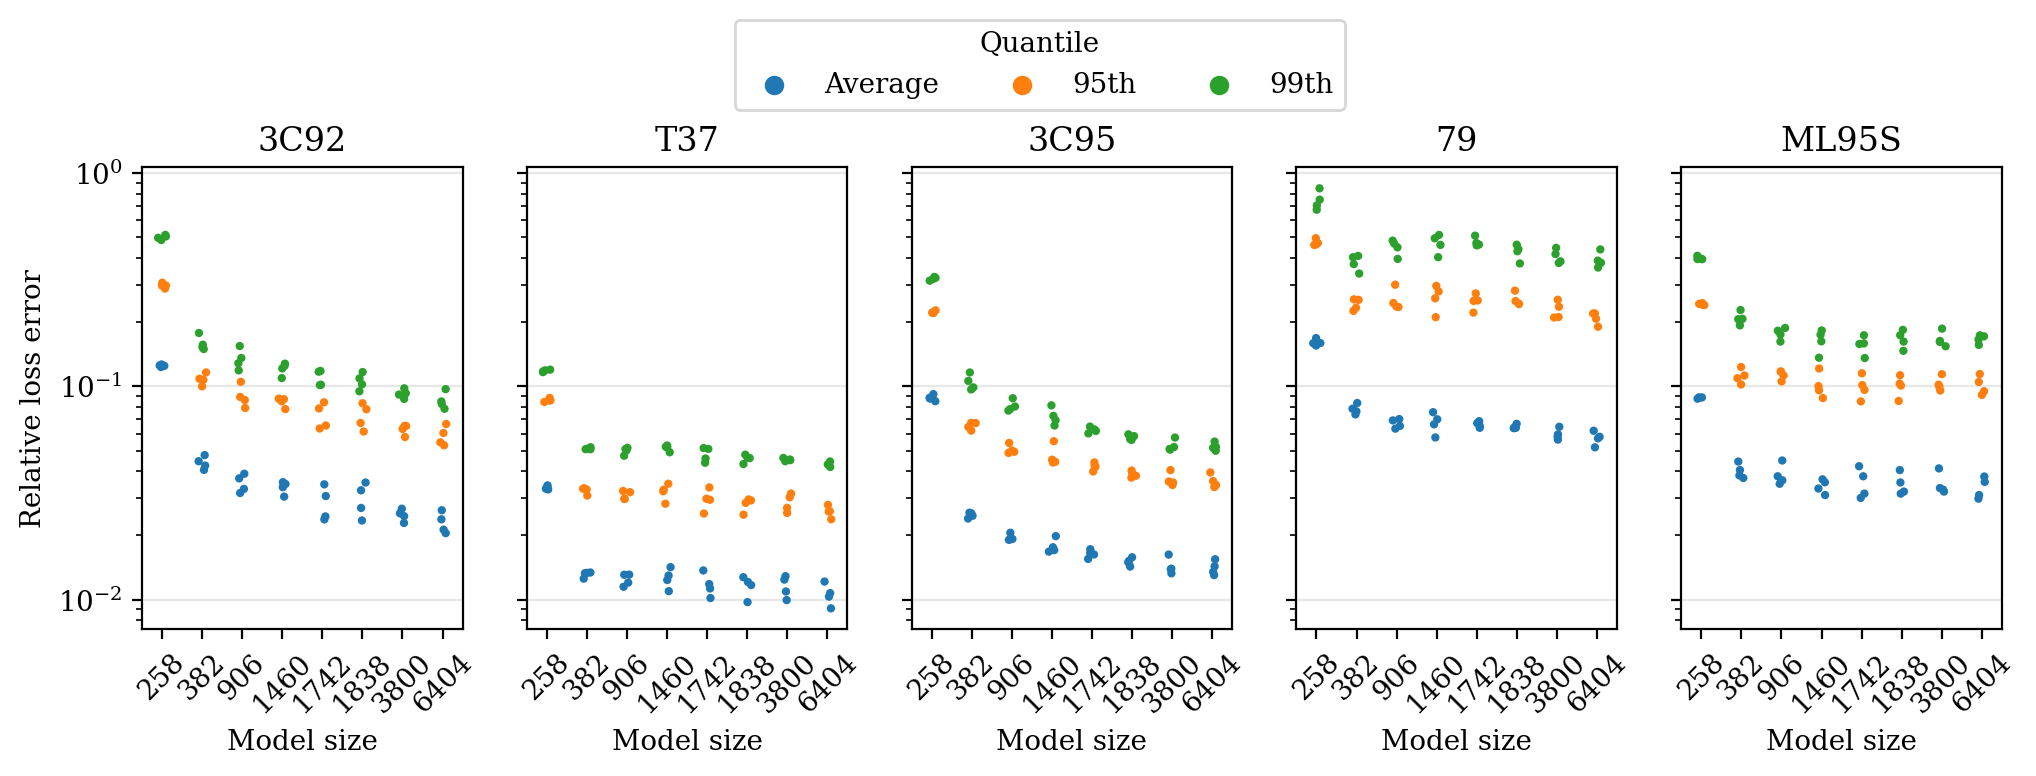

In [77]:
fig, axes = plt.subplots(1, 5, figsize=(12, 3), sharey=True)
err_cols = [
    c for c in meta_info_df if c.endswith("rel_err") and not c.startswith("max")
]
expid_l = {
    #"75010",
    #"58ab3",
    #"14abf",
    #"ea89c",
    #"60642",  # best original
    #"0a2ef",
    #"a70ae",
    #"49405",  # trapz
    #"ef5cc",  # trapz, additive ploss, h&p detached
    "9df83", # trapz, additive ploss
    "07cd3", # trapz ,additve ploss
    "314de", # trapz, additive ploss
    "68a16", # trapz, additive ploss
    "cd184", # trapz, additive ploss
    "ebf34", # trapz, additive ploss
    "da6f5", # trapz, additive ploss
    "436f3", # trapz, additive ploss
}

for ax, (mat_lbl, mat_df) in zip(
    axes.flatten(),
    err_info_df.query("experiment_uid in @expid_l").groupby("material"),
):
    # errs = mat_df.loc[:, err_cols].to_numpy().ravel()

    sp = sns.stripplot(
        mat_df,
        x="model_size", #"experiment_uid",# "model_size",#
        y="Error",
        hue="Quantile",
        ax=ax,
        size=3,
        legend=True,
    )
    ax.set_ylabel("Relative loss error")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_title(mat2mat_d[mat_lbl])
    ax.set_yscale("log")
    ax.set_xlabel("Model size")
    leg = sp.get_legend()
    leg.set_visible(False)
sns.move_legend(
    sp,
    "upper center",
    bbox_to_anchor=(0.4, 1.35),
    ncol=3,
    bbox_transform=axes[2].transAxes,
)

fig.savefig(IMG_PATH / "pareto_front.pdf", dpi=300, bbox_inches="tight")

In [69]:
# show same plot but use only H prediction and trapz formula


In [70]:
mat_df.groupby('material')['95-perc_rel_err'].transform('min')

KeyError: 'Column not found: 95-perc_rel_err'

In [ ]:
# for final paper delivery table
tmp_df = meta_info_df.query("experiment_uid == '58ab3' and fold == 0")
tmp_df.loc[tmp_df.loc[:, '95-perc_rel_err'] == tmp_df.groupby('material')['95-perc_rel_err'].transform('min'), :]

#for mat_lbl, mat_df in meta_info_df.query("experiment_uid == 'ea89c'").groupby('material'):
#    print(mat_df.loc[mat_df.loc[:, '95-perc_rel_err'] == mat_df.loc[:, '95-perc_rel_err'].min(), :])

experiment_uid material model_uid  seed  fold  avg_rel_err  \
1340          58ab3        A  f2f15ded     0     0     0.023383   
1360          58ab3        B  1085fa20     0     0     0.010997   
1392          58ab3        C  76461c26     3     0     0.014578   
1408          58ab3        D  d40accf6     2     0     0.070290   
1428          58ab3        E  ea8d57f5     2     0     0.025124   

      95-perc_rel_err  99-perc_rel_err   max_rel_err          start_date  \
1340         0.061989         0.089049  389973.40625 2023-12-16 12:14:52   
1360         0.026826         0.045513  167140.00000 2023-12-16 17:40:36   
1392         0.036989         0.059355  328585.59375 2023-12-17 18:29:09   
1408         0.257627         0.476592  769743.68750 2023-12-17 23:40:52   
1428         0.070980         0.127102  670233.12500 2023-12-18 01:57:12   

                end_date  debug  subsample_factor  batch_size  n_folds  \
1340 2023-12-18 04:18:53  False                 1          64        4   
1360 2023-12-18 04:18:53  False                 1          64        4   
1392 2023-12-18 04:18:53  False                 1          64        4   
1408 2023-12-18 04:18:53  False                 1          64        4   
1428 2023-12-18 04:18:53  False                 1          64        4   

      predicts_p_directly  n_epochs  \
1340                 True      5000   
1360                 True      5000   
1392                 True      5000   
1408                 True      5000   
1428                 True      5000   

                                                    tag  model_size  
1340  first cnn layer has minimum neurons followd by...        1755  
1360  first cnn layer has minimum neurons followd by...        1755  
1392  first cnn layer has minimum neurons followd by...        1755  
1408  first cnn layer has minimum neurons followd by...        1755  
1428  first cnn layer has minimum neurons followd by...        1755

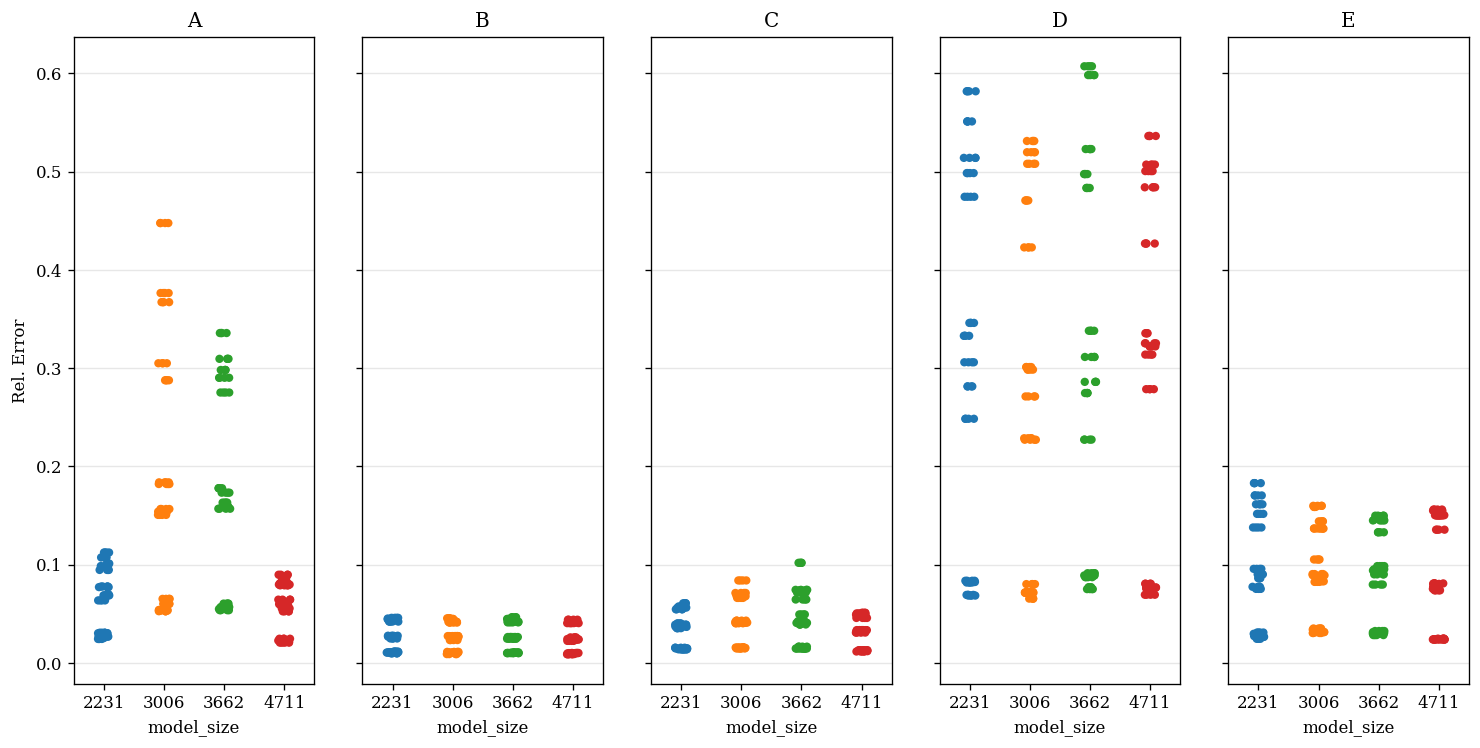

In [ ]:
# evaluate FFT features (experimental)
fig, axes = plt.subplots(1, 5, figsize=(15, 7), sharey=True)
err_cols = [
    c for c in meta_info_df if c.endswith("rel_err") and not c.startswith("max")
]
expid_l = {
    "14abf",
    "ea89c",
    "b7cd2","bfd85"
}

for ax, (mat_lbl, mat_df) in zip(
    axes.flatten(),
    meta_info_df.query(
        "debug == False and experiment_uid in @expid_l"
    ).groupby("material"),
):
    # errs = mat_df.loc[:, err_cols].to_numpy().ravel()
    for c in err_cols:
        sns.stripplot(
            mat_df,
            x="model_size",
            y=c,
            hue="experiment_uid",
            ax=ax,
            legend=False,
        )
    ax.set_ylabel("Rel. Error")
    #ax.text(0.05, 0.9, s=mat_lbl, transform=ax.transAxes, fontdict={'size': 20})
    ax.set_title(mat_lbl)

# Learning Curves

In [ ]:
def show_learn_curves(learn_curve_df_):
    fig, axes = plt.subplots(5, 4, sharex=True, sharey=True, figsize=(20, 10))
    for (mat, seed), seed_df in learn_curve_df_.groupby(['material', 'seed']):
        for fold_i in range(4):
            ax = axes["ABCDE".index(mat), fold_i]
            ax.plot(seed_df.loc[:, f"loss_trends_train_h_fold_{fold_i}"].to_numpy(), color='tab:blue', alpha=0.5, label='train h' if fold_i==0 and seed==0 else None, zorder=0)
            ax.plot(seed_df.loc[:, f"loss_trends_train_p_fold_{fold_i}"].to_numpy(), color='tab:orange', alpha=0.5, label='train p' if fold_i==0 and seed==0 else None, zorder=0)
            ax.scatter(np.arange(len(seed_df)), seed_df.loc[:, f"loss_trends_val_h_fold_{fold_i}"].to_numpy(), color='tab:green', alpha=0.5, label='val h' if fold_i==0 and seed==0 else None, s=3, zorder=3)
            ax.scatter(np.arange(len(seed_df)), seed_df.loc[:, f"loss_trends_val_p_fold_{fold_i}"].to_numpy(), color='tab:red', alpha=0.5, label='val p' if fold_i==0 and seed==0 else None, s=3, zorder=3)
            ax.set_yscale('log')

    for ax in axes.flatten():
        ax.grid(alpha=.3)
        ax.set_ylim(None, 10)
    for ax in axes[-1, :]:
        ax.set_xlabel('Epochs')
    for axi, ax in enumerate(axes[0, :]):
        ax.set_title(f"Fold {axi}")
    for ax, mat in zip(axes[:, 0], "ABCDE"):
        ax.set_ylabel(f'Loss Mat {mat}')
    axes[0, 0].legend(ncol=2)

In [ ]:
learn_curve_df = pd.read_csv(Path.cwd().parent / 'data' / 'output' / "learning_curves_cnn_49405.csv.zip")
learn_curve_df

loss_trends_train_h_fold_0  loss_trends_train_h_fold_1  \
0                         0.072420                    0.064542   
1                         0.056551                    0.037152   
2                         0.061051                    0.032341   
3                         0.077045                    0.092943   
4                         0.049008                    0.034996   
...                            ...                         ...   
124995                    0.001704                    0.001417   
124996                    0.001835                    0.001779   
124997                    0.001540                    0.001510   
124998                    0.002064                    0.001385   
124999                    0.001701                    0.001363   

        loss_trends_train_h_fold_2  loss_trends_train_h_fold_3  \
0                         0.121227                    0.171743   
1                         0.045154                    0.094977   
2                         0.092322                    0.097294   
3                         0.063946                    0.066731   
4                         0.090276                    0.044299   
...                            ...                         ...   
124995                    0.001450                    0.002389   
124996                    0.001402                    0.002177   
124997                    0.001555                    0.002007   
124998                    0.001381                    0.002024   
124999                    0.001454                    0.002218   

        loss_trends_val_h_fold_0  loss_trends_val_h_fold_1  \
0                       0.092447                  0.097045   
1                            NaN                       NaN   
2                            NaN                       NaN   
3                            NaN                       NaN   
4                            NaN                       NaN   
...                          ...                       ...   
124995                       NaN                       NaN   
124996                       NaN                       NaN   
124997                       NaN                       NaN   
124998                       NaN                       NaN   
124999                  0.001734                  0.001508   

        loss_trends_val_h_fold_2  loss_trends_val_h_fold_3  \
0                       0.094464                  0.082352   
1                            NaN                       NaN   
2                            NaN                       NaN   
3                            NaN                       NaN   
4                            NaN                       NaN   
...                          ...                       ...   
124995                       NaN                       NaN   
124996                       NaN                       NaN   
124997                       NaN                       NaN   
124998                       NaN                       NaN   
124999                  0.001529                  0.002091   

        loss_trends_train_p_fold_0  loss_trends_train_p_fold_1  \
0                         0.283301                    0.331161   
1                         0.185713                    0.138433   
2                         0.230088                    0.342206   
3                         0.246246                    0.193445   
4                         0.148583                    0.175063   
...                            ...                         ...   
124995                    0.000287                    0.000551   
124996                    0.000486                    0.000594   
124997                    0.000895                    0.000942   
124998                    0.000297                    0.000343   
124999                    0.000588                    0.000803   

        loss_trends_train_p_fold_2  loss_trends_train_p_fold_3  \
0                         0.395286                    0.604547   
1      

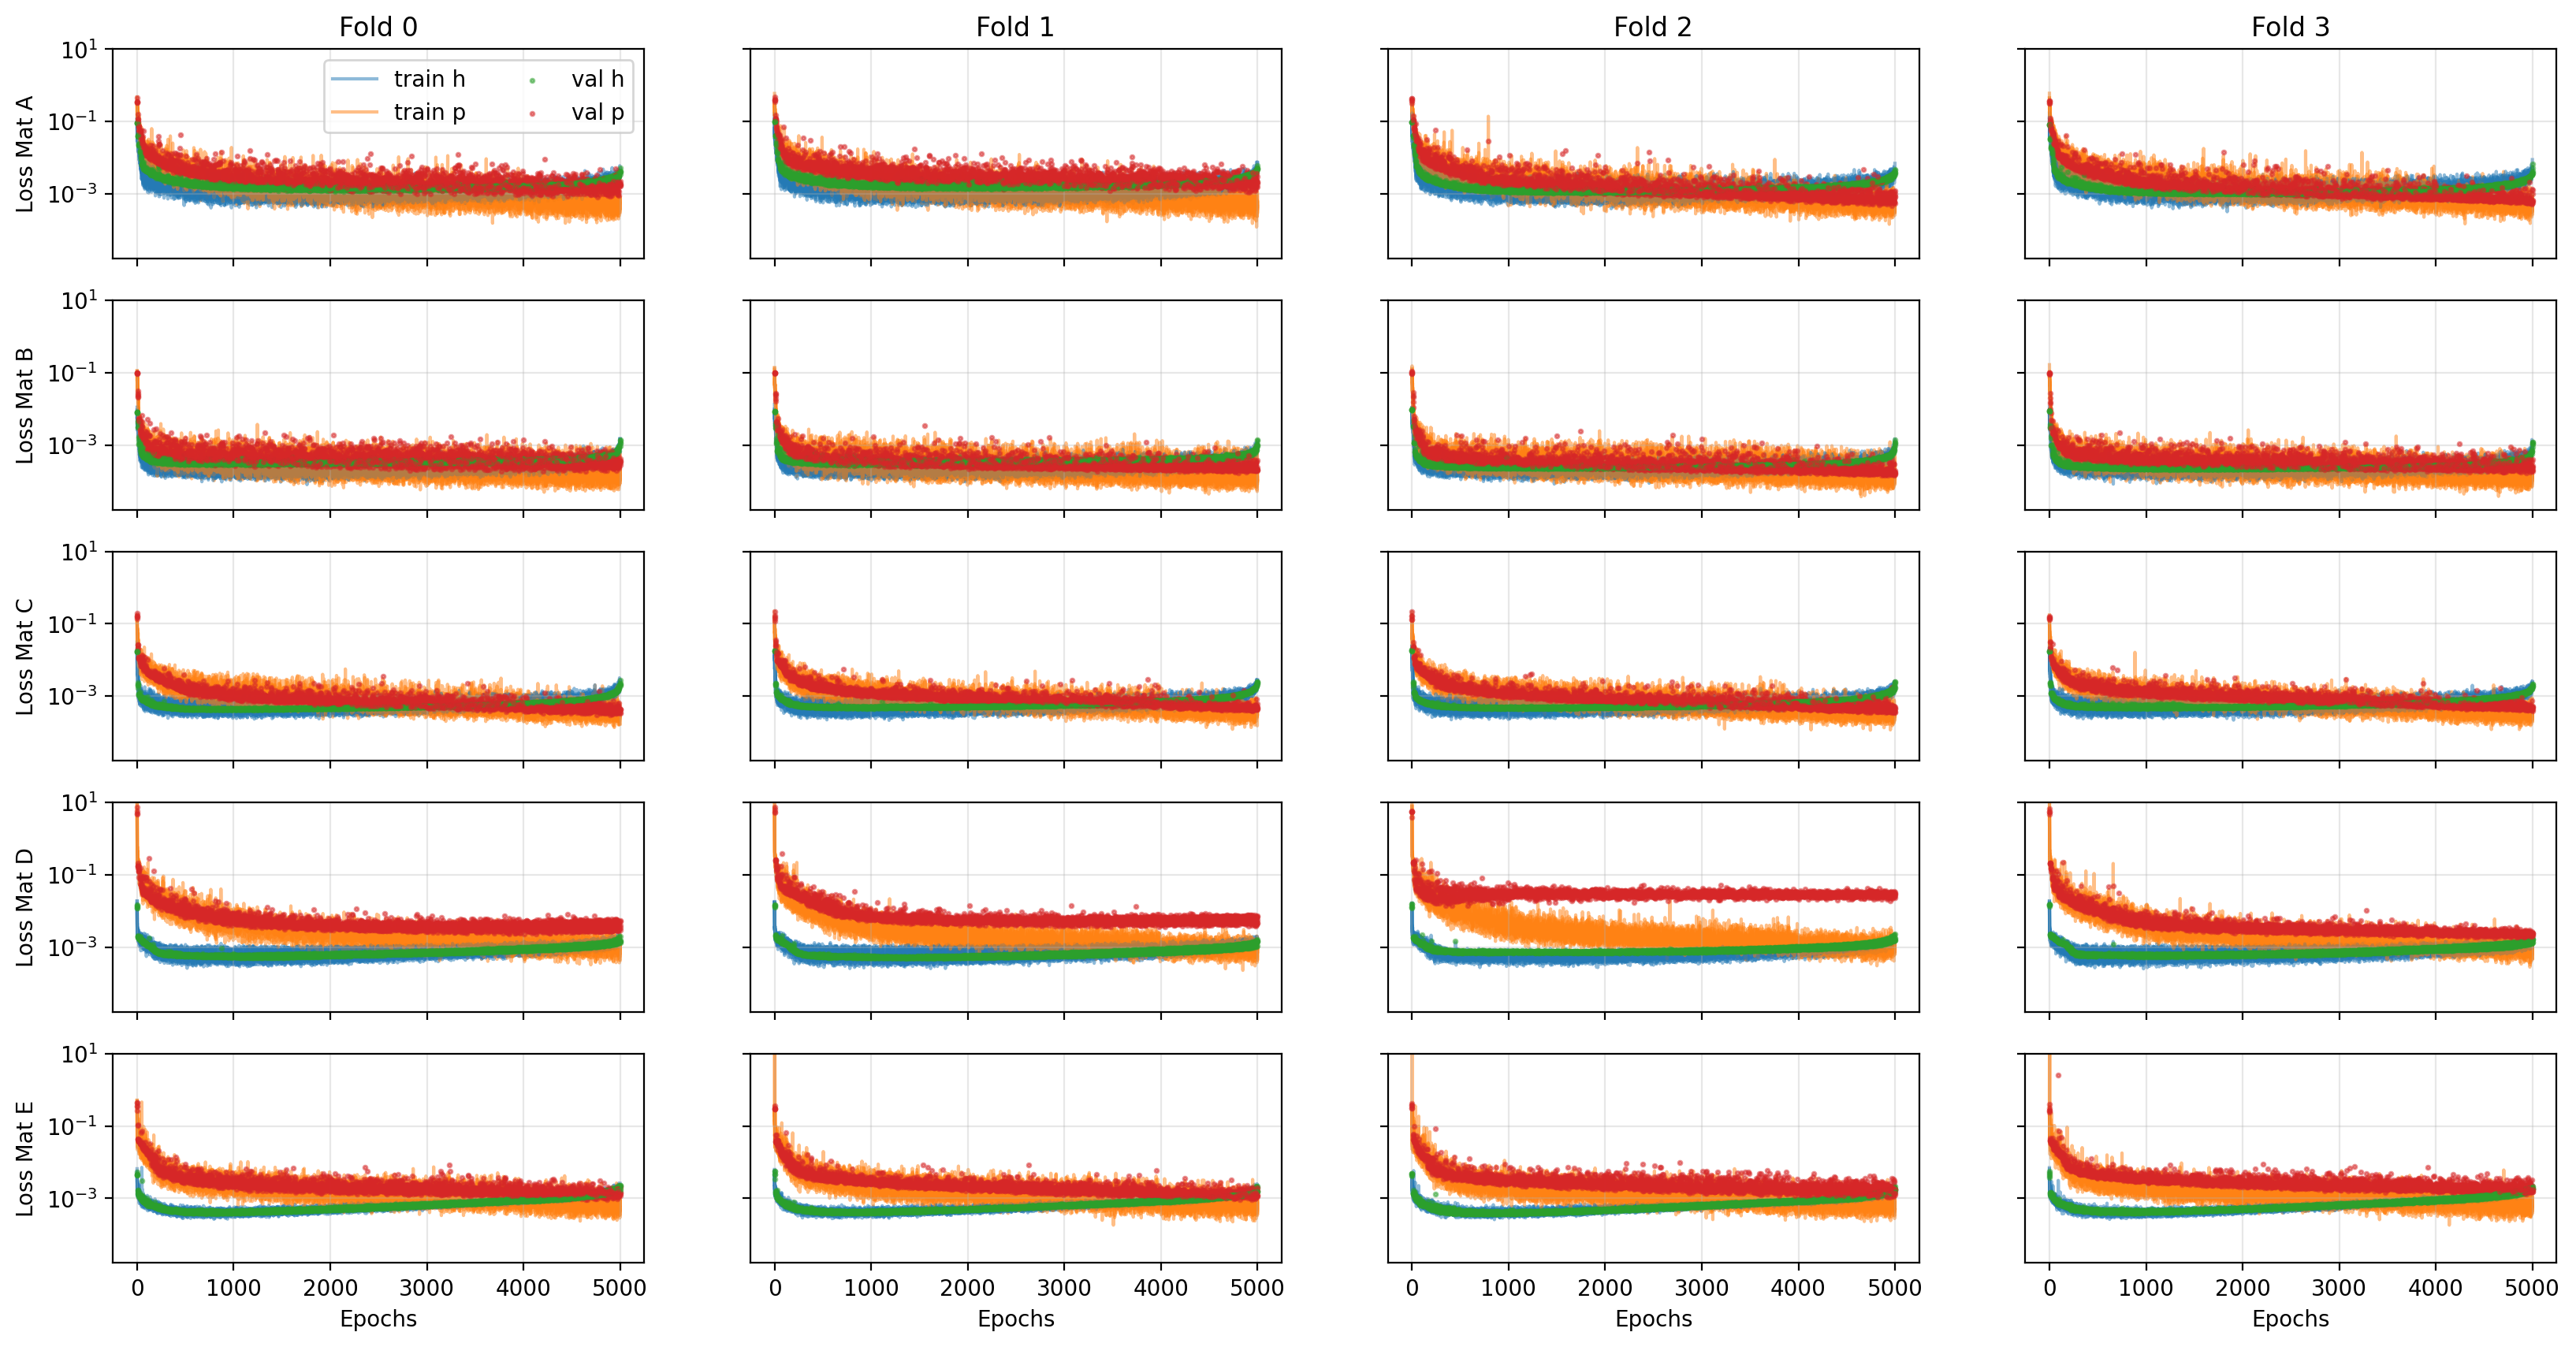

In [ ]:
show_learn_curves(learn_curve_df)

In [ ]:
learn_curve_df = pd.read_csv(Path.cwd().parent / 'data' / 'output' / "learning_curves_cnn_ef5cc.csv.zip")
learn_curve_df

loss_trends_train_h_fold_0  loss_trends_train_h_fold_1  \
0                        0.074721                    0.076483   
1                        0.058416                    0.062318   
2                        0.061052                    0.086242   
3                        0.075380                    0.040297   
4                        0.045901                    0.040411   
...                           ...                         ...   
49995                    0.000150                    0.000120   
49996                    0.000151                    0.000135   
49997                    0.000154                    0.000148   
49998                    0.000161                    0.000200   
49999                    0.000178                    0.000219   

       loss_trends_train_h_fold_2  loss_trends_train_h_fold_3  \
0                        0.073354                    0.133744   
1                        0.116366                    0.148898   
2                        0.050147                    0.084470   
3                        0.037675                    0.112105   
4                        0.060741                    0.134433   
...                           ...                         ...   
49995                    0.000159                    0.000166   
49996                    0.000175                    0.000208   
49997                    0.000203                    0.000141   
49998                    0.000184                    0.000249   
49999                    0.000153                    0.000204   

       loss_trends_val_h_fold_0  loss_trends_val_h_fold_1  \
0                      0.095490                  0.101128   
1                           NaN                       NaN   
2                           NaN                       NaN   
3                           NaN                       NaN   
4                           NaN                       NaN   
...                         ...                       ...   
49995                       NaN                       NaN   
49996                       NaN                       NaN   
49997                       NaN                       NaN   
49998                       NaN                       NaN   
49999                  0.000177                  0.000179   

       loss_trends_val_h_fold_2  loss_trends_val_h_fold_3  \
0                      0.099579                  0.083216   
1                           NaN                       NaN   
2                           NaN                       NaN   
3                           NaN                       NaN   
4                           NaN                       NaN   
...                         ...                       ...   
49995                       NaN                       NaN   
49996                       NaN                       NaN   
49997                       NaN                       NaN   
49998                       NaN                       NaN   
49999                  0.000193                  0.000207   

       loss_trends_train_p_fold_0  loss_trends_train_p_fold_1  \
0                        0.262592                    0.432994   
1                        0.281846                    0.590078   
2                        0.235633                    0.302648   
3                        0.258543                    0.334940   
4                        0.251461                    0.498049   
...                           ...                         ...   
49995                    0.003928                    0.005611   
49996                    0.005035                    0.002099   
49997                    0.003450                    0.005516   
49998                    0.002866                    0.002542   
49999                    0.002340                    0.003974   

       loss_trends_train_p_fold_2  loss_trends_train_p_fold_3  \
0                        0.295304                    0.444436   
1                        0.398370                    0.343999   
2  

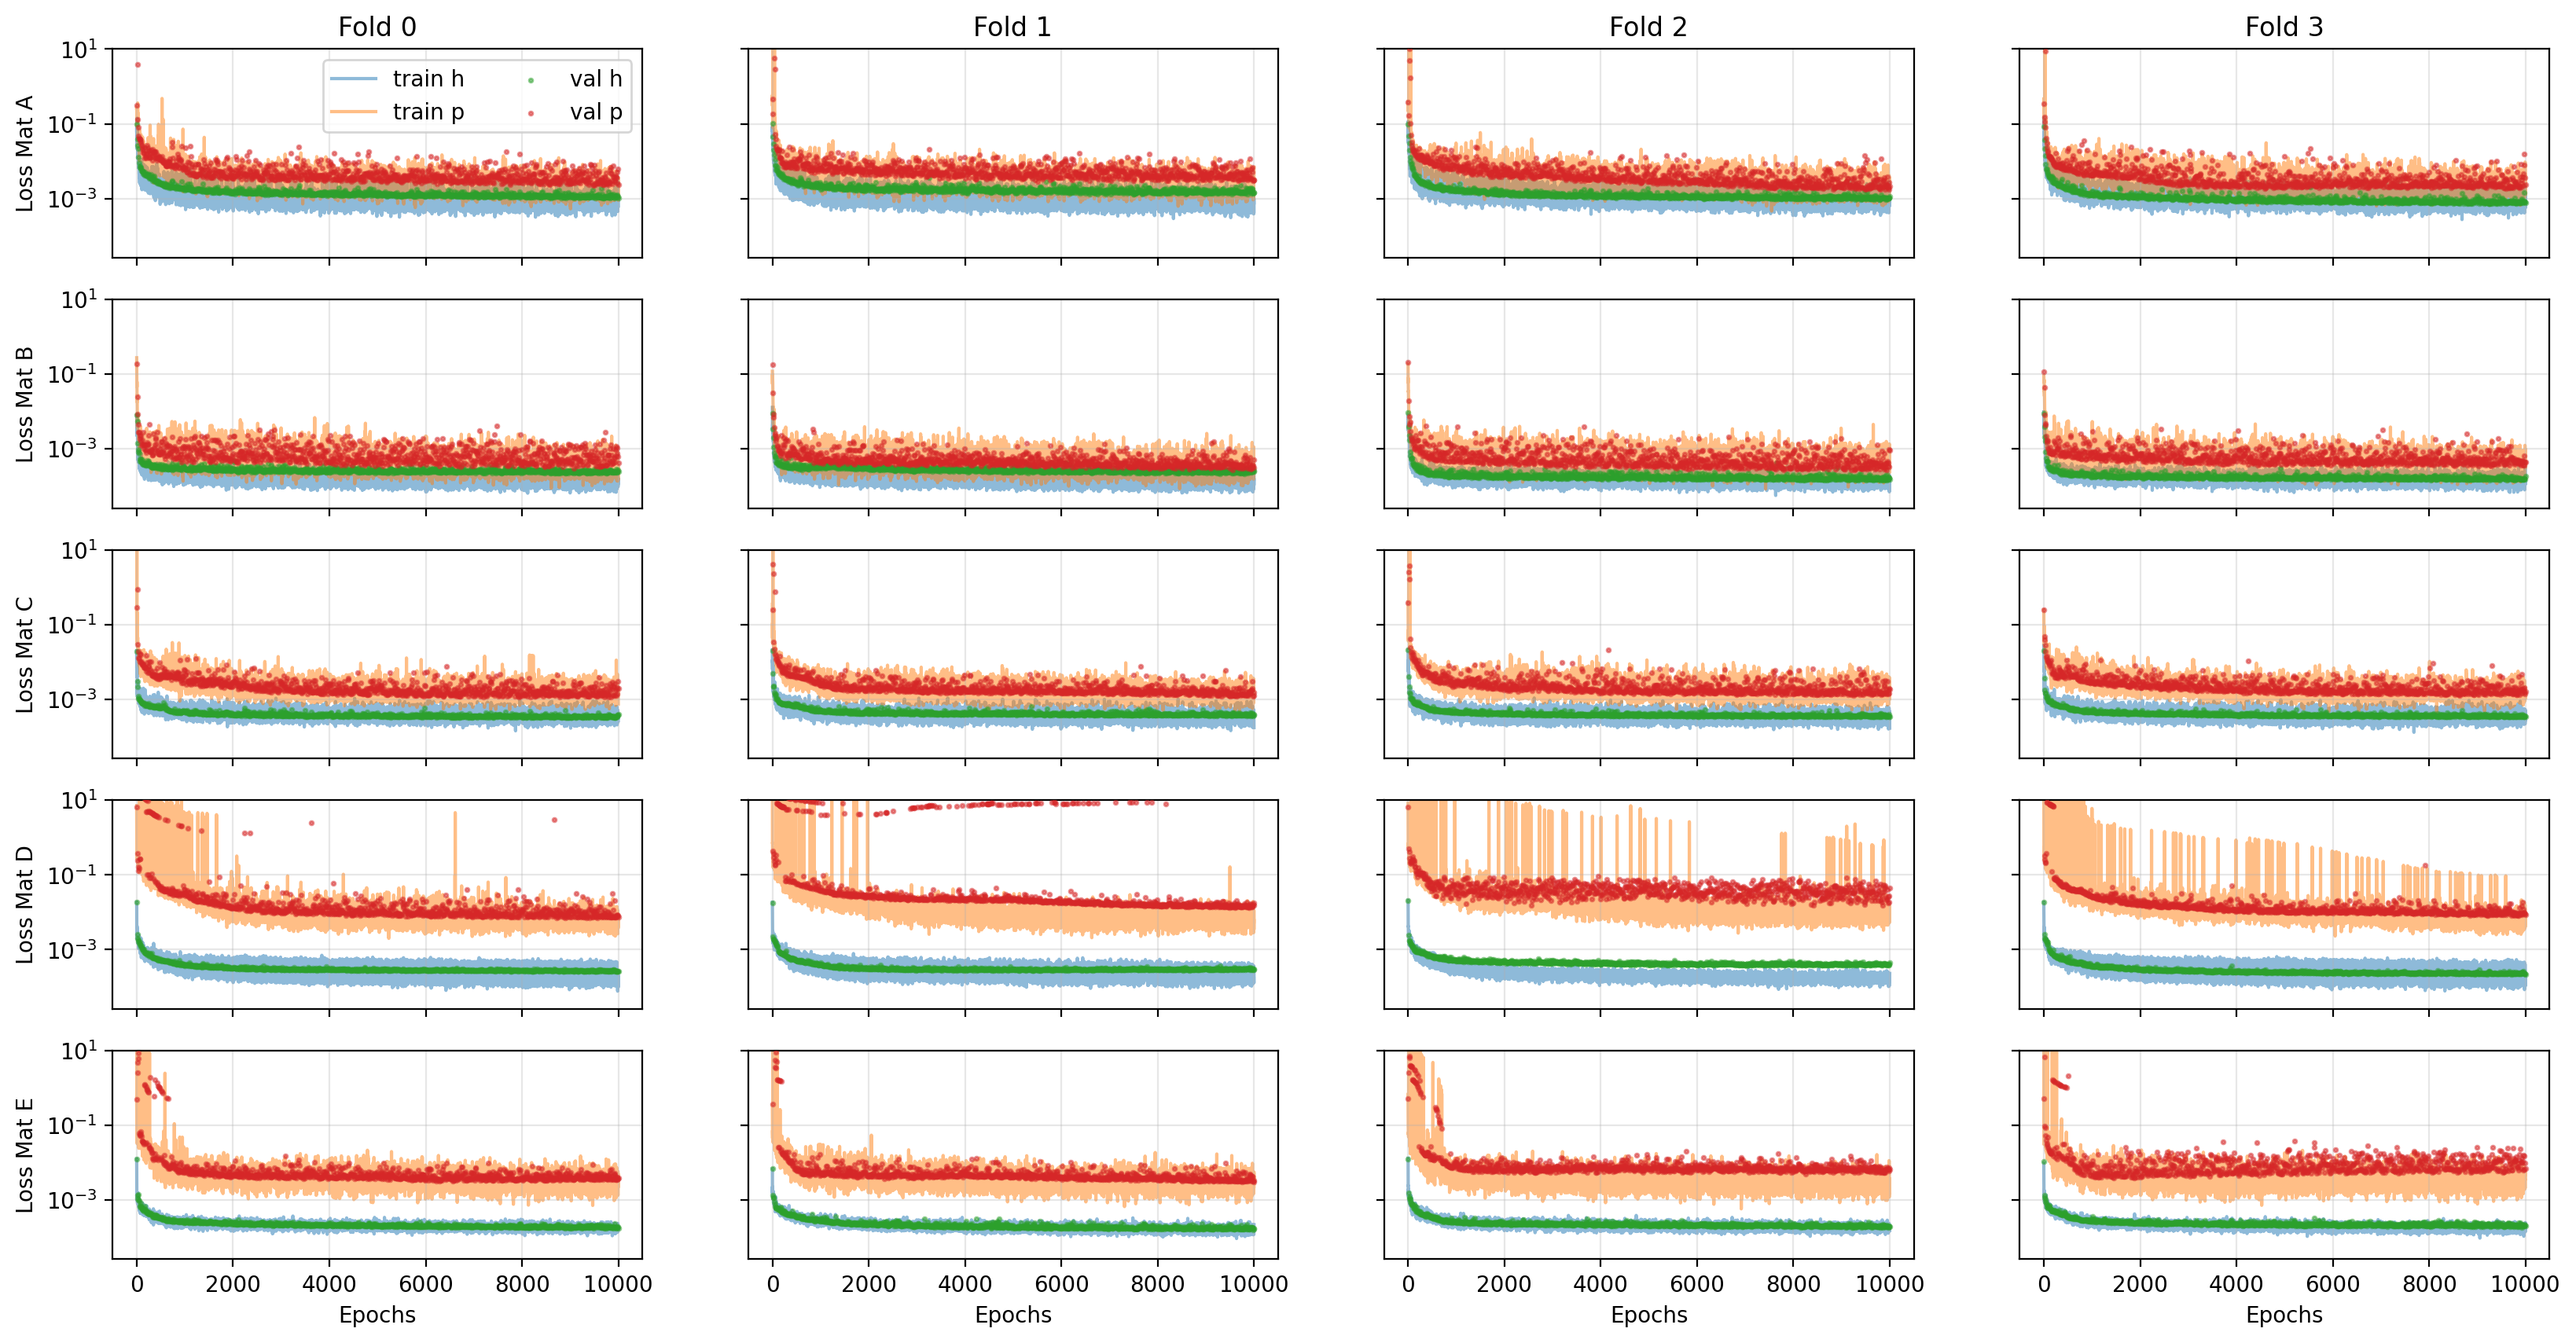

In [ ]:
show_learn_curves(learn_curve_df)

In [ ]:
learn_curve_df = pd.read_csv(Path.cwd().parent / 'data' / 'output' / "learning_curves_cnn_b5226.csv.zip")
learn_curve_df

loss_trends_train_h_fold_0  loss_trends_train_h_fold_1  \
0                        0.074721                    0.067742   
1                        0.058407                    0.038392   
2                        0.061046                    0.032295   
3                        0.075394                    0.102701   
4                        0.045922                    0.039592   
...                           ...                         ...   
24995                    0.002847                    0.002424   
24996                    0.002869                    0.002356   
24997                    0.002719                    0.002816   
24998                    0.002736                    0.002635   
24999                    0.002627                    0.002372   

       loss_trends_train_h_fold_2  loss_trends_train_h_fold_3  \
0                        0.128491                    0.174681   
1                        0.047666                    0.097742   
2                        0.095123                    0.105550   
3                        0.066926                    0.070223   
4                        0.093134                    0.049040   
...                           ...                         ...   
24995                    0.002344                    0.002560   
24996                    0.002676                    0.002453   
24997                    0.002310                    0.002252   
24998                    0.002251                    0.002494   
24999                    0.002728                    0.002418   

       loss_trends_val_h_fold_0  loss_trends_val_h_fold_1  \
0                      0.095490                  0.101780   
1                           NaN                       NaN   
2                           NaN                       NaN   
3                           NaN                       NaN   
4                           NaN                       NaN   
...                         ...                       ...   
24995                       NaN                       NaN   
24996                       NaN                       NaN   
24997                       NaN                       NaN   
24998                       NaN                       NaN   
24999                  0.002719                  0.002668   

       loss_trends_val_h_fold_2  loss_trends_val_h_fold_3  \
0                      0.100146                  0.084990   
1                           NaN                       NaN   
2                           NaN                       NaN   
3                           NaN                       NaN   
4                           NaN                       NaN   
...                         ...                       ...   
24995                       NaN                       NaN   
24996                       NaN                       NaN   
24997                       NaN                       NaN   
24998                       NaN                       NaN   
24999                  0.002340                  0.002545   

       loss_trends_train_p_fold_0  loss_trends_train_p_fold_1  \
0                        0.268715                    0.615966   
1                        0.124474                    0.146887   
2                        0.118891                    0.304062   
3                        0.109690                    0.129545   
4                        0.131481                    0.147865   
...                           ...                         ...   
24995                    0.000534                    0.001000   
24996                    0.000450                    0.000679   
24997                    0.001239                    0.000449   
24998                    0.000410                    0.000573   
24999                    0.000423                    0.001342   

       loss_trends_train_p_fold_2  loss_trends_train_p_fold_3  \
0                        0.367749                    0.667866   
1                        0.313205                    0.246652   
2  

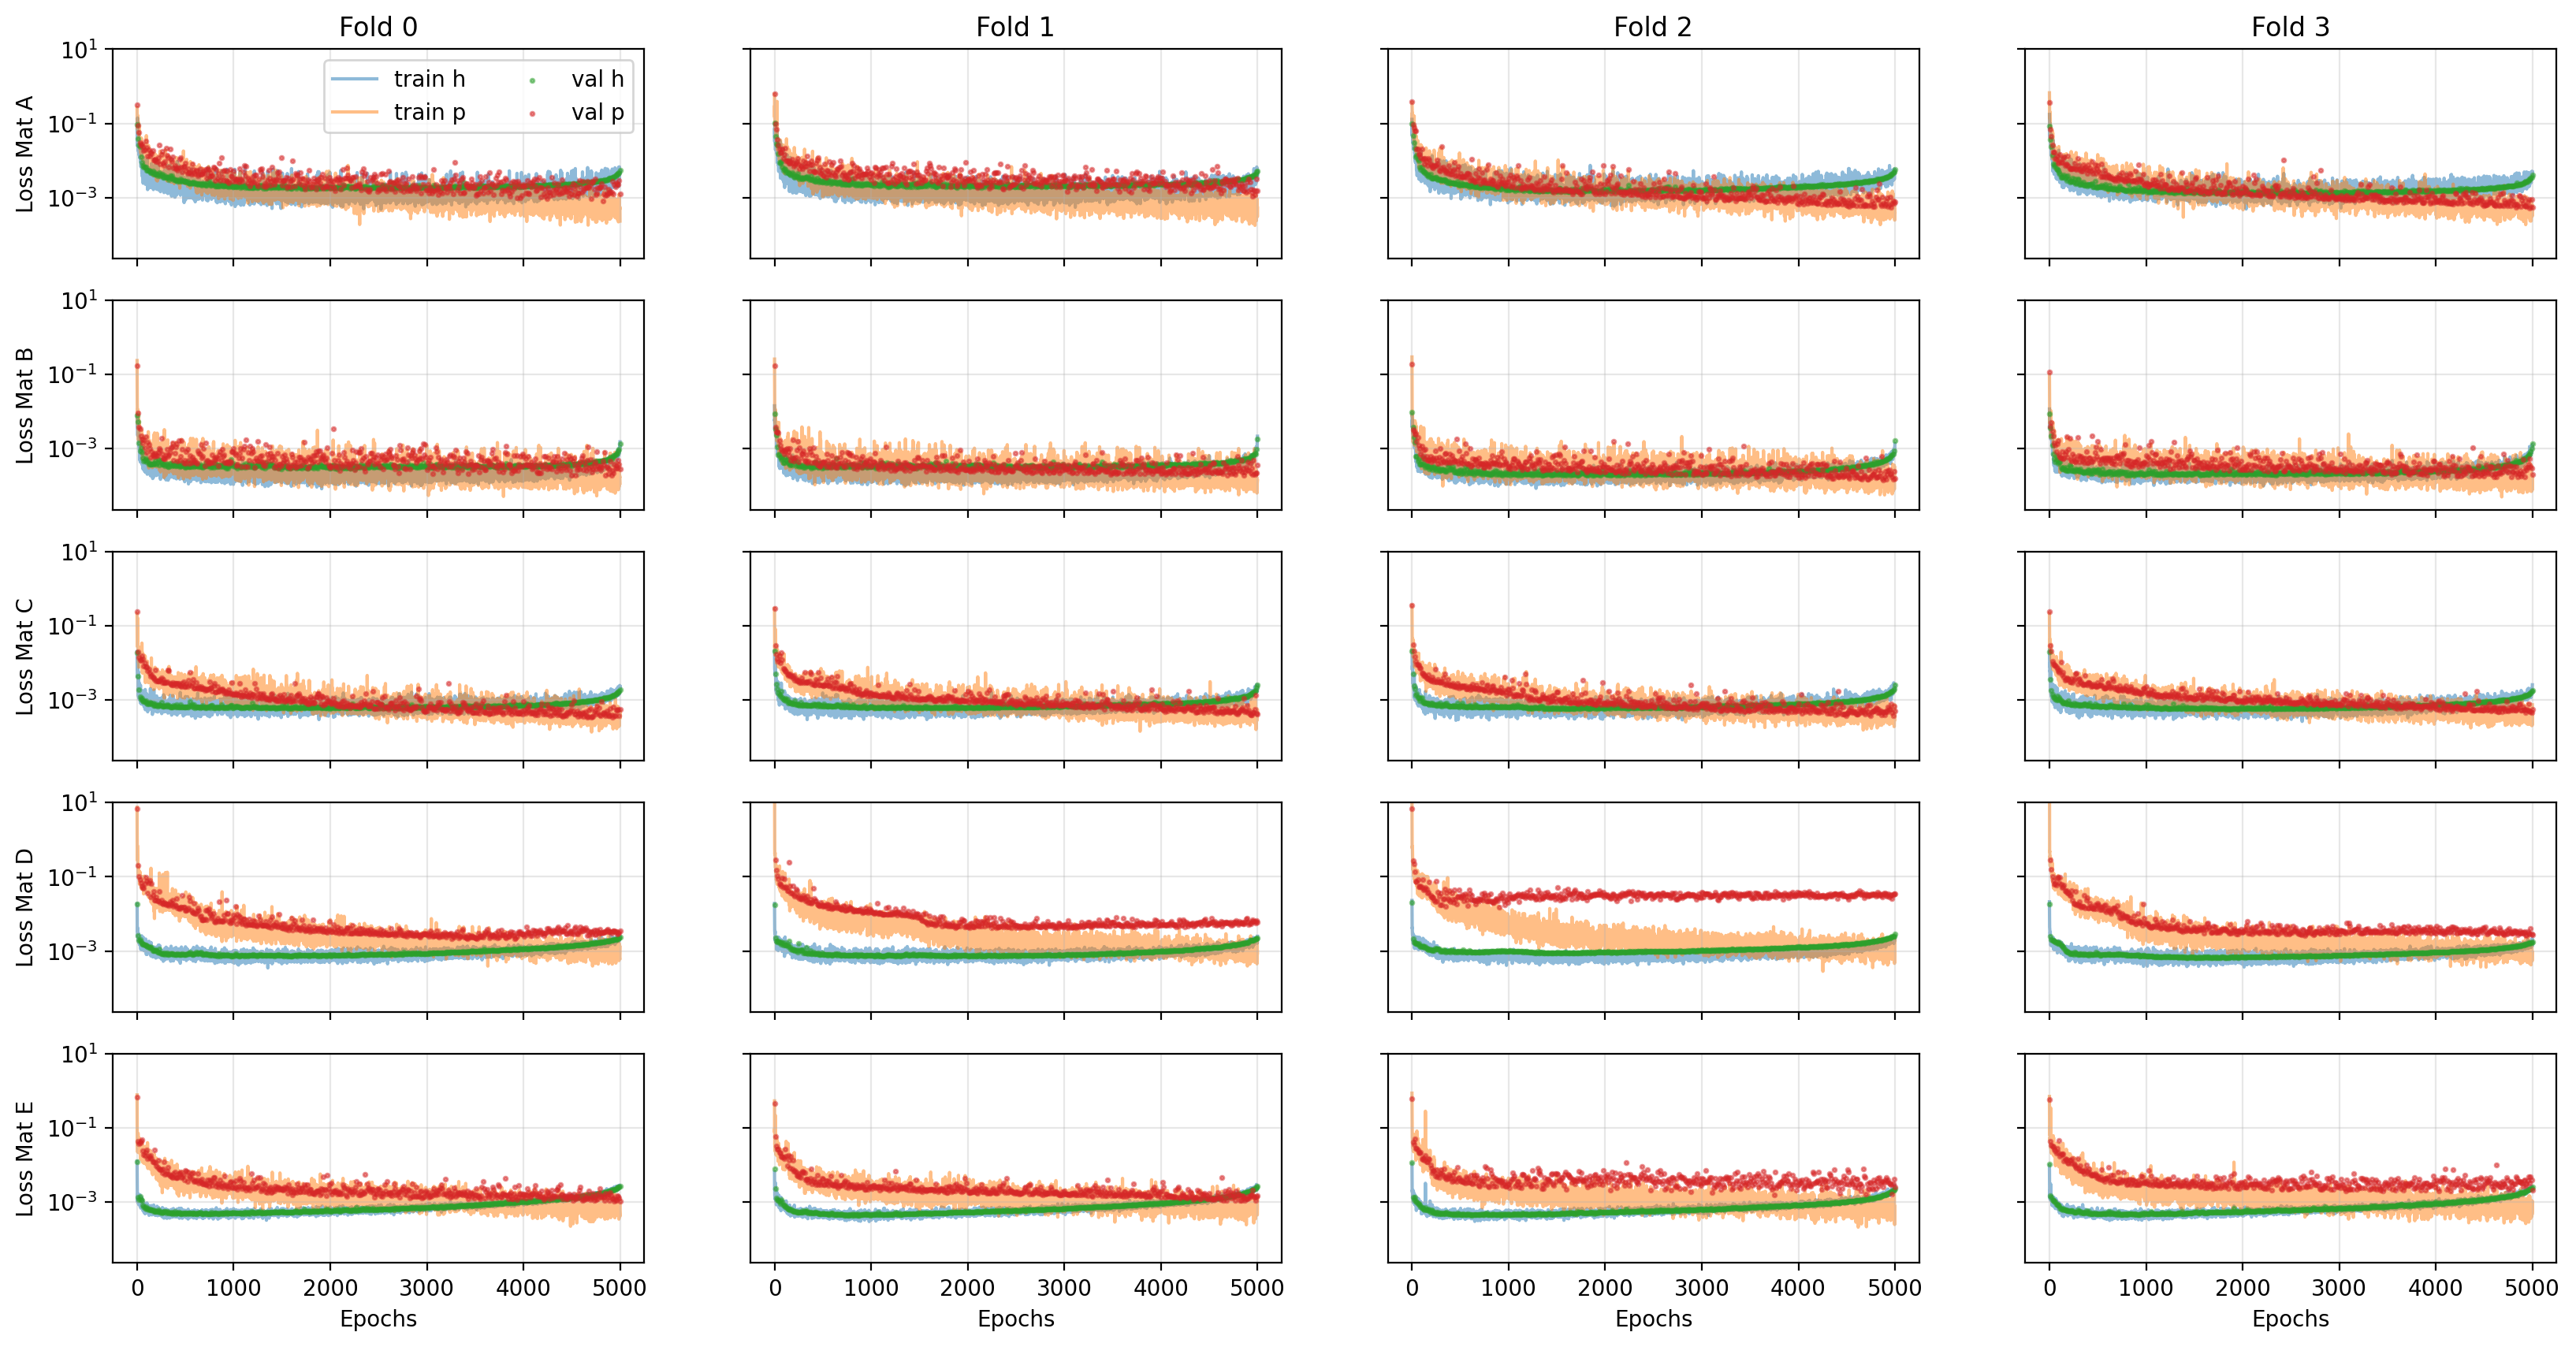

In [ ]:
show_learn_curves(learn_curve_df)